In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alesssaulea/bdd100k")

print("Path to dataset files:", path)

100%|██████████| 5.80G/5.80G [01:08<00:00, 91.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alesssaulea/bdd100k/versions/2


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd
import json
import yaml
from glob import glob

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8n model (nano version)
model = YOLO('yolov8n.pt')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import os

TRAIN_IMG_DIR = os.path.join(path, 'images/100k/train')
TRAIN_LABEL_DIR = os.path.join(path, 'labels/det_20/train')

VAL_IMG_DIR = os.path.join(path, 'images/100k/val')
VAL_LABEL_DIR = os.path.join(path, 'labels/det_20/val')

print(f"training img: {len(os.listdir(TRAIN_IMG_DIR))}")
print(f"training label: {len(os.listdir(TRAIN_LABEL_DIR))}")

print(f"validation img: {len(os.listdir(VAL_IMG_DIR))}")
print(f"validation label: {len(os.listdir(VAL_LABEL_DIR))}")

training img: 70000
training label: 69863
validation img: 10000
validation label: 10000


In [ ]:
WORKING_TRAIN_DIR = os.path.join('/content', 'working', 'train')
WORKING_TRAIN_IMG_DIR = os.path.join(WORKING_TRAIN_DIR, 'images')
WORKING_TRAIN_LABEL_DIR = os.path.join(WORKING_TRAIN_DIR, 'labels')

WORKING_VAL_DIR = os.path.join('/content', 'working', 'val')
WORKING_VAL_IMG_DIR = os.path.join(WORKING_VAL_DIR, 'images')
WORKING_VAL_LABEL_DIR = os.path.join(WORKING_VAL_DIR, 'labels')

os.makedirs(WORKING_TRAIN_IMG_DIR, exist_ok=True)
os.makedirs(WORKING_TRAIN_LABEL_DIR, exist_ok=True)

os.makedirs(WORKING_VAL_IMG_DIR, exist_ok=True)
os.makedirs(WORKING_VAL_LABEL_DIR, exist_ok=True)

In [ ]:
import shutil
import os

for img_name in os.listdir(TRAIN_IMG_DIR):
    label_name = img_name.replace('.jpg', '.json')
    label_path = os.path.join(TRAIN_LABEL_DIR, label_name)
    if os.path.exists(label_path):
        shutil.copy(os.path.join(TRAIN_IMG_DIR, img_name), os.path.join(WORKING_TRAIN_IMG_DIR, img_name))
        shutil.copy(label_path, os.path.join(WORKING_TRAIN_LABEL_DIR, img_name.replace('.jpg', '.json')))


for img_name in os.listdir(VAL_IMG_DIR):
    label_name = img_name.replace('.jpg', '.json')
    label_path = os.path.join(VAL_LABEL_DIR, label_name)
    if os.path.exists(label_path):
      shutil.copy(os.path.join(VAL_IMG_DIR, img_name), os.path.join(WORKING_VAL_IMG_DIR, img_name))
      shutil.copy(label_path, os.path.join(WORKING_VAL_LABEL_DIR, img_name.replace('.jpg', '.json')))


print(f"training img: {len(os.listdir(WORKING_TRAIN_IMG_DIR))}")
print(f"training label: {len(os.listdir(WORKING_TRAIN_LABEL_DIR))}")

print(f"validation img: {len(os.listdir(WORKING_VAL_IMG_DIR))}")
print(f"validation label: {len(os.listdir(WORKING_VAL_LABEL_DIR))}")

training img: 69863
training label: 69863
validation img: 10000
validation label: 10000


In [ ]:
LABELS = ['truck', 'traffic light', 'pedestrian', 'car', 'bus', 'traffic sign', 'bicycle', 'rider', 'motorcycle', 'trailer', 'train', 'other person' 'other vehicle']
IMG_WIDTH = 1280
IMG_HEIGHT = 720
train_imgs = glob(os.path.join(WORKING_TRAIN_IMG_DIR, '*.jpg'))
train_labels = glob(os.path.join(WORKING_TRAIN_LABEL_DIR, '*.json'))
val_imgs = glob(os.path.join(WORKING_VAL_IMG_DIR, '*.jpg'))
val_labels = glob(os.path.join(WORKING_VAL_LABEL_DIR, '*.json'))

n_samples = 5

train_sample_imgs = np.random.choice(train_imgs, n_samples)
val_sample_imgs = np.random.choice(val_imgs, n_samples)

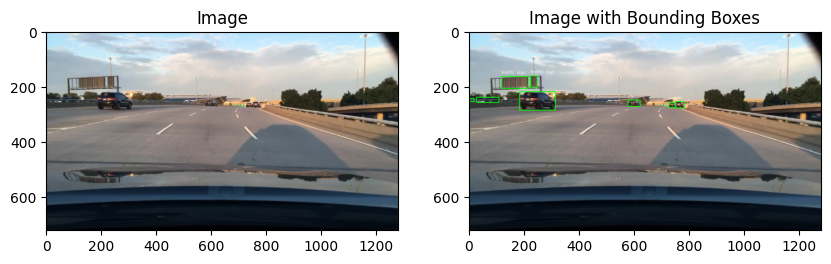

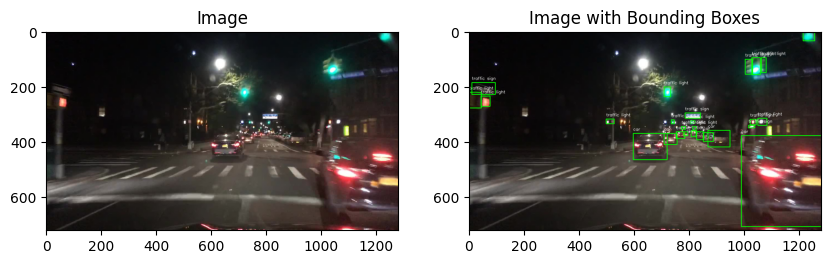

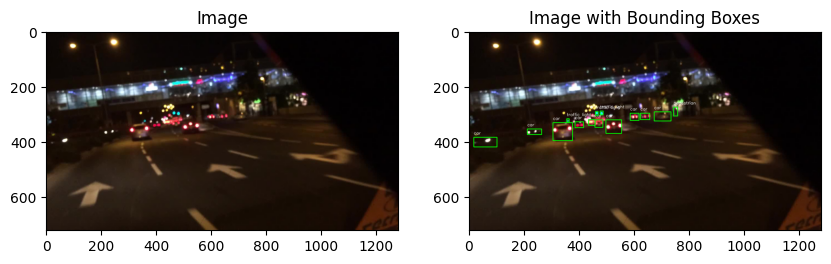

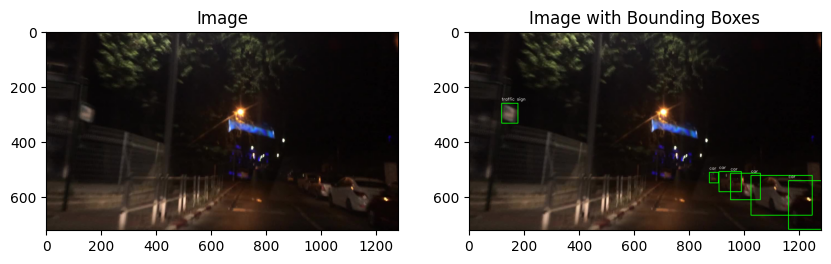

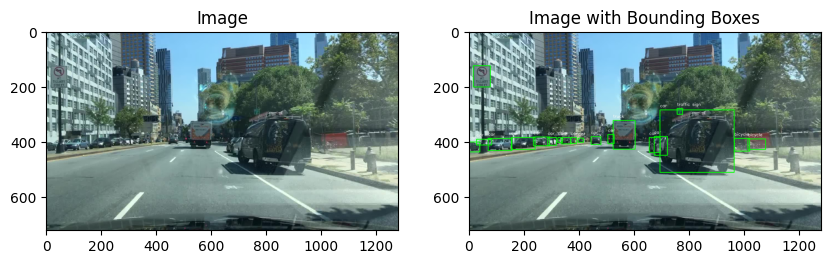

In [ ]:
def plot_bboxes(img, labels, img_width, img_height):
    """Draw bounding boxes on an image."""
    for label in labels:
        if 'box2d' in label:
            box = label['box2d']
            x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']
            # Draw rectangle
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            # Put category text
            category = label.get('category', 'unknown')
            cv2.putText(img, category, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
    return img


for i in range(n_samples):
    _, ax = plt.subplots(1, 2, figsize=(10, 5))
    img_path = train_sample_imgs[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Construct the corresponding label file path
    label_path = img_path.replace(WORKING_TRAIN_IMG_DIR, WORKING_TRAIN_LABEL_DIR).replace('.jpg', '.json')

    labels = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            data = json.load(f)
            if 'labels' in data and isinstance(data['labels'], list):
                labels = data['labels']

    img_with_bboxes = plot_bboxes(img.copy(), labels, IMG_WIDTH, IMG_HEIGHT)

    ax[0].imshow(img)
    ax[0].set_title('Image')
    ax[1].imshow(img_with_bboxes)
    ax[1].set_title('Image with Bounding Boxes')
    plt.show()

In [ ]:
def json_to_yolo(json_path, img_width, img_height, classes):
    """Converts JSON label file to YOLO format."""
    yolo_labels = []
    with open(json_path, 'r') as f:
        data = json.load(f)

    if 'labels' in data and isinstance(data['labels'], list):
        for obj in data['labels']:
            if 'box2d' in obj and 'category' in obj:
                box = obj['box2d']
                category = obj['category']

                # Get class index
                try:
                    class_id = classes.index(category)
                except ValueError:
                    print(f"Warning: Category '{category}' not found in classes list. Skipping object.")
                    continue

                # Convert bounding box to YOLO format (x_center, y_center, width, height)
                x1, y1, x2, y2 = box['x1'], box['y1'], box['x2'], box['y2']

                # Ensure coordinates are within image boundaries
                x1 = max(0, x1)
                y1 = max(0, y1)
                x2 = min(img_width, x2)
                y2 = min(img_height, y2)

                x_center = (x1 + x2) / 2.0 / img_width
                y_center = (y1 + y2) / 2.0 / img_height
                width = (x2 - x1) / img_width
                height = (y2 - y1) / img_height

                yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_labels

# Convert training labels
for json_path in train_labels:
    img_name = os.path.basename(json_path).replace('.json', '.jpg')
    img_path = os.path.join(WORKING_TRAIN_IMG_DIR, img_name)

    yolo_labels = json_to_yolo(json_path, IMG_WIDTH, IMG_HEIGHT, LABELS)

    yolo_label_path = os.path.join(WORKING_TRAIN_LABEL_DIR, img_name.replace('.jpg', '.txt'))
    with open(yolo_label_path, 'w') as f:
        for label in yolo_labels:
            f.write(label + '\n')

print("Converted training labels to YOLO format.")

# Convert validation labels
for json_path in val_labels:
    img_name = os.path.basename(json_path).replace('.json', '.jpg')
    img_path = os.path.join(WORKING_VAL_IMG_DIR, img_name)

    yolo_labels = json_to_yolo(json_path, IMG_WIDTH, IMG_HEIGHT, LABELS)

    yolo_label_path = os.path.join(WORKING_VAL_LABEL_DIR, img_name.replace('.jpg', '.txt'))
    with open(yolo_label_path, 'w') as f:
        for label in yolo_labels:
            f.write(label + '\n')

print("Converted validation labels to YOLO format.")

print(f"training label (YOLO format): {len(os.listdir(WORKING_TRAIN_LABEL_DIR))}")
print(f"validation label (YOLO format): {len(os.listdir(WORKING_VAL_LABEL_DIR))}")

Converted training labels to YOLO format.
Converted validation labels to YOLO format.
training label (YOLO format): 139726
validation label (YOLO format): 20000


In [ ]:
data = {
    'train': WORKING_TRAIN_DIR,
    'val': WORKING_VAL_DIR,
    'names': LABELS,
    'nc': len(LABELS)
}

with open('data.yaml', 'w') as f:
    yaml.dump(data, f)

In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8n model
model = YOLO('/content/runs/detect/yolov8n_custom_model_trained/weights/best.pt')

results = model.train(
    data = '/content/data.yaml',
    imgsz=640,
    epochs=1,  # You can increase epochs for better training
    batch=32,
    name="yolov8n_custom_model_trained" # Changed name to avoid overwriting previous run
)

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/yolov8n_custom_model_trained/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom_model_trained2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tr

train: Scanning /content/working/train/labels.cache... 69863 images, 10 backgrounds, 0 corrupt: 100%|██████████| 69863/69863 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 554.6±176.1 MB/s, size: 52.8 KB)


val: Scanning /content/working/val/labels.cache... 10000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10000/10000 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom_model_trained2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom_model_trained2
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      8.36G      1.353     0.9465     0.9988        228        640: 100%|██████████| 2184/2184 [23:14<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [01:37<00:00,  1.61it/s]


                   all      10000     185947      0.593      0.281      0.282      0.153

1 epochs completed in 0.417 hours.
Optimizer stripped from runs/detect/yolov8n_custom_model_trained2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom_model_trained2/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom_model_trained2/weights/best.pt...
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 157/157 [01:29<00:00,  1.75it/s]


                   all      10000     185947      0.595      0.281      0.282      0.153
                 truck       2733       4243       0.56      0.333      0.383      0.259
         traffic light       5651      26884      0.386      0.389      0.317      0.106
            pedestrian       3261      13425      0.518      0.416      0.426      0.197
                   car       9882     102837      0.651      0.614       0.65      0.401
                   bus       1299       1660      0.305      0.436      0.339       0.26
          traffic sign       8211      34724      0.538      0.374      0.385      0.191
               bicycle        592       1039       0.53      0.189      0.223     0.0995
                 rider        527        658      0.597      0.199      0.234      0.104
            motorcycle        346        460      0.461      0.137      0.147     0.0621
               trailer          2          2          1          0          0          0
                 trai


image 1/1 /content/working/val/images/bb81a7a9-4469e43e.jpg: 384x640 6 cars, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


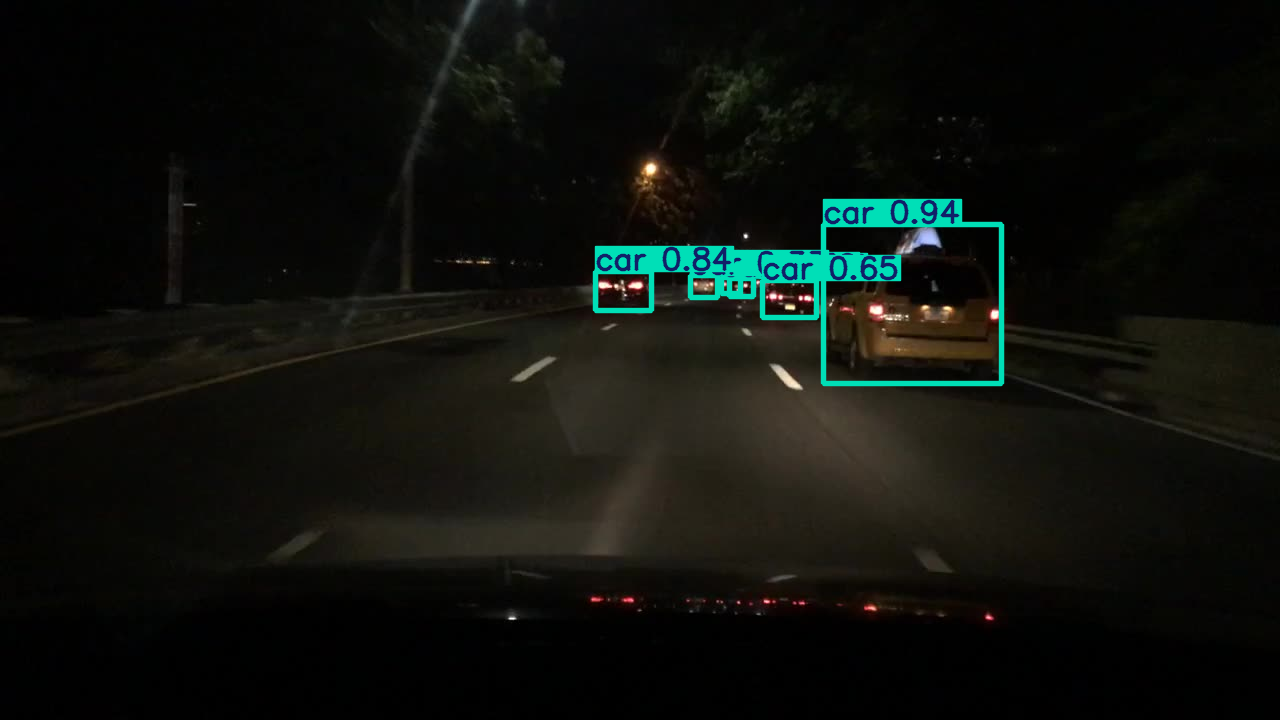

In [ ]:
import random
from PIL import Image

# Choose a random image from the validation set
random_img_path = random.choice(val_sample_imgs)

# Run inference on the chosen image
results = model.predict(source=random_img_path)

# Display the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)

# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error. Modify the selected empty cell based on the requirements, remember to include the modified cell id(s) in your response. Requirements: i want to download the model so i can upload to streamlit, also write the code that will build a streamlit interface for people to upload video and it will detect object as the video plays

## Download the trained model

### Subtask:
Download the trained YOLOv8 model saved during the training process.


**Reasoning**:
Identify the path to the best trained model weights from the training output logs and copy the `best.pt` file to the current working directory using shell commands.



In [ ]:
import shutil

# Identify the path to the best trained model weights from the training output logs.
# Based on the output of the training cell, the best model is saved at:
best_model_path = '/content/runs/detect/yolov8n_custom_model_trained2/weights/best.pt'

# Use appropriate shell commands to copy the best.pt file to a readily accessible location.
destination_path = '/content/best.pt'
shutil.copy(best_model_path, destination_path)

print(f"Copied the best trained model to: {destination_path}")

Copied the best trained model to: /content/best.pt


## Create a streamlit application script

### Subtask:
Create a streamlit application script that will serve as the Streamlit application.


**Reasoning**:
Create the `app.py` file and write the initial Streamlit application structure with necessary imports.



In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import torch
from ultralytics import YOLO
from PIL import Image
import cv2
import os
import tempfile

st.title('Object Detection with YOLOv8')
st.write('Upload a video to detect objects using a custom-trained YOLOv8 model.')

# Load the trained YOLOv8 model
# Ensure the model path is correct based on where you saved it
model_path = '/content/best.pt'  # Update this path if needed
if not os.path.exists(model_path):
    st.error(f"Model file not found at {model_path}. Please ensure the model is downloaded to this location.")
else:
    model = YOLO(model_path)

    uploaded_file = st.file_uploader("Choose a video file", type=["mp4", "avi", "mov", "mkv"])

    if uploaded_file is not None:
        # Save the uploaded video to a temporary file
        with tempfile.NamedTemporaryFile(delete=False, suffix=".mp4") as tmp_file:
            tmp_file.write(uploaded_file.getvalue())
            video_path = tmp_file.name

        st.video(video_path)

        st.write("Processing video...")

        # Open the video file
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            st.error("Error: Could not open video file.")
        else:
            frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = int(cap.get(cv2.CAP_PROP_FPS))

            # Create a placeholder to display the video with detections
            stframe = st.empty()

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Perform object detection
                results = model(frame)

                # Plot results on the frame
                annotated_frame = results[0].plot()

                # Convert the annotated frame from BGR to RGB for displaying in Streamlit
                annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

                # Display the annotated frame
                stframe.image(annotated_frame_rgb, channels="RGB", use_column_width=True)

            cap.release()
            os.unlink(video_path) # Delete the temporary file
            st.write("Finished processing video.")

2025-08-05 12:38:06.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.210 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-05 12:38:06.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar